# Example 5: Simulated nonlinear property

Generate simulated nonlinear properties. This example just shows an example of generating the simulated profiles.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pysra

%matplotlib inline

In [2]:
# Increased figure sizes
plt.rcParams['figure.dpi'] = 120

Create a soil layer, which defines the median value.

In [3]:
soil_type = pysra.site.DarendeliSoilType(
    18., plas_index=0, ocr=1, stress_mean=50)

Create the simulated nonlinear curves

In [4]:
n = 10
correlation = 0
simulated = []

for name, model in zip(['Darendeli (2001)', 'EPRI SPID (2014)'],
                       [pysra.variation.DarendeliVariation(correlation),
                        pysra.variation.SpidVariation(correlation)]):
    simulated.append(
        (name, [model(soil_type) for _ in range(n)])
    )

Compare the uncertainty models.

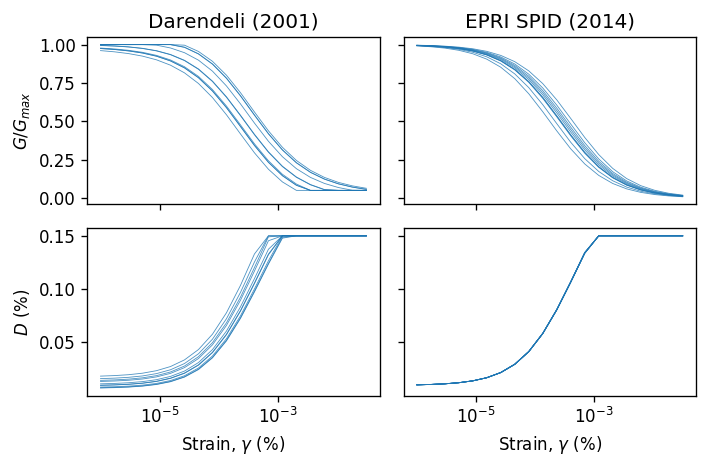

In [5]:
fig, axes = plt.subplots(
    2, 2, sharex=True, sharey='row', subplot_kw={'xscale': 'log'})

for i, (name, sims) in enumerate(simulated):
    for j, prop in enumerate(['mod_reduc', 'damping']):
        axes[j, i].plot(
            getattr(soil_type, prop).strains,
            np.transpose([getattr(s, prop).values for s in sims]),
            linewidth=0.5, color='C0', alpha=0.8)
        if j == 0:
            axes[j, i].set_title(name)

axes[0, 0].set_ylabel('$G/G_{max}$')
axes[1, 0].set_ylabel('$D$ (%)')
plt.setp(axes[1, :], xlabel='Strain, $\gamma$ (%)')

fig.tight_layout();